Text(0.5, 1.0, 'Figure 5.10')

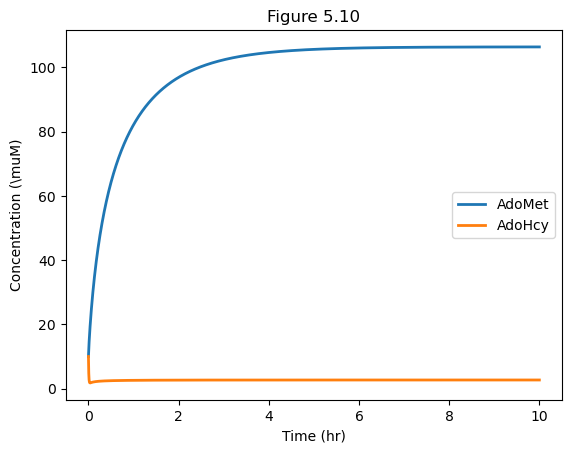

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#parameter assignment
#METI
v_MATI_max = 561
K_MATI_m = 41
K_MATI_i = 50

#MATIII
v_MATIII_max = 22870 #22.87 mmol/hr/l;
K_MATIII_m2 = 21.1

#MET
v_MET_max = 4544
A_over_K_MET_m2 = 0.1

#GNMT
v_GNMT_max = 10600 #10.6 mmol/hr/l;
K_GNMT_m = 4500
K_GNMT_i = 20

#D
alpha_d = 1333

#AHC
K_AHC = 0.1
Adenosine = 1

#Methionine concentration
Met=48.5


#declare right-hand-side for model
def methdt(S,t):
    dS=[0,0] #generate a list to store derivatives
 

#define states locally
    AdoMet=S[0]
    AdoHcy=S[1]

#auxilliary variables
    K_MATIII_m1 = 20000/(1+ 5.7*(np.power(AdoMet/(AdoMet+600),2)))
    K_MET_m1 = 10 * (1 + AdoHcy/4)
    Hcy = AdoHcy*K_AHC/Adenosine


    v_MATI= v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+AdoMet/K_MATI_i))) 
    v_MATIII = v_MATIII_max * (1/(1+ (K_MATIII_m1*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))
    v_GNMT = v_GNMT_max * (1/(1+np.power(K_GNMT_m/AdoMet,2.3))) * (1/(1+AdoHcy/K_GNMT_i))
    v_MET = v_MET_max * (1/(1+ K_MET_m1/AdoMet + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*(K_MET_m1/AdoMet)))
    V_D = alpha_d * Hcy;

    dAdoMetdt = (v_MATI + v_MATIII) - (v_GNMT+v_MET);
    dAdoHcydt = ((v_GNMT+v_MET) - V_D)/(1+K_AHC/Adenosine);

    dS[0]=dAdoMetdt
    dS[1]=dAdoHcydt

    return dS

#set simulation length
Tend=10;

#initial concentrations
S0=[10,10];

times=np.linspace(0,Tend,10000)

#simulation
S=odeint(methdt, S0, times) 

#plot figure  5.10
plt.figure() #generate figure
plt.plot(times, S[:,0], label="AdoMet", linewidth=2)
plt.plot(times, S[:,1], label="AdoHcy", linewidth=2)
plt.xlabel("Time (hr)")
plt.ylabel("Concentration (\muM)")
plt.legend()
# plt.xlim(0, 1)
plt.title('Figure 5.10')

In [2]:
Adomet_ss = S[-1,0]
Adohcy_ss = S[-1,1]

In [3]:
# Define flux equations for each enzyme at steady state
def calculate_fluxes(Adomet_ss, Adohcy_ss):
    K_MATIII_m1 = 20000/(1+ 5.7*(np.power(Adomet_ss/(Adomet_ss+600),2)))
    K_MET_m1 = 10 * (1 + Adohcy_ss/4)
    Hcy = Adohcy_ss*K_AHC/Adenosine


    v_MATI= v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+Adomet_ss/K_MATI_i))) 
    v_MATIII = v_MATIII_max * (1/(1+ (K_MATIII_m1*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))
    v_GNMT = v_GNMT_max * (1/(1+np.power(K_GNMT_m/Adomet_ss,2.3))) * (1/(1+Adohcy_ss/K_GNMT_i))
    v_MET = v_MET_max * (1/(1+ K_MET_m1/Adomet_ss + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*(K_MET_m1/Adomet_ss)))
    V_D = alpha_d * Hcy;


    return v_MATI, v_MATIII, v_GNMT, v_MET, V_D

In [4]:
calculate_fluxes(Adomet_ss, Adohcy_ss)

(153.93619307569904,
 204.7475740550287,
 1.698357733997185,
 356.9745488085106,
 358.67286443837787)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [13]:
#parameter assignment
#METI
v_MATI_max = 561
K_MATI_m = 41
K_MATI_i = 50

#MATIII
v_MATIII_max = 22870 #22.87 mmol/hr/l;
K_MATIII_m2 = 21.1

#MET
v_MET_max = 4544
A_over_K_MET_m2 = 0.1

#GNMT
v_GNMT_max = 10600 #10.6 mmol/hr/l;
K_GNMT_m = 4500
K_GNMT_i = 20

#D
alpha_d = 1333

#AHC
K_AHC = 0.1
Adenosine = 1

#Methionine concentration
Met=48.5

In [15]:
#declare right-hand-side for model
def methdt(S,t):
    dS=[0,0] #generate a list to store derivatives
 

#define states locally
    AdoMet=S[0]
    AdoHcy=S[1]

#auxilliary variables
    K_MATIII_m1 = 20000/(1+ 5.7*(np.power(AdoMet/(AdoMet+600),2)))
    K_MET_m1 = 10 * (1 + AdoHcy/4)
    Hcy = AdoHcy*K_AHC/Adenosine


    v_MATI= v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+AdoMet/K_MATI_i))) 
    v_MATIII = v_MATIII_max * (1/(1+ (K_MATIII_m1*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))
    v_GNMT = v_GNMT_max * (1/(1+np.power(K_GNMT_m/AdoMet,2.3))) * (1/(1+AdoHcy/K_GNMT_i))
    v_MET = v_MET_max * (1/(1+ K_MET_m1/AdoMet + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*(K_MET_m1/AdoMet)))
    V_D = alpha_d * Hcy;

    dAdoMetdt = (v_MATI + v_MATIII) - (v_GNMT+v_MET);
    dAdoHcydt = ((v_GNMT+v_MET) - V_D)/(1+K_AHC/Adenosine);

    dS[0]=dAdoMetdt
    dS[1]=dAdoHcydt

    return dS

In [22]:
#set simulation length
Tend=100;

#initial concentrations
S0=[10,10];

times=np.linspace(0,Tend,10000)

#simulation
S=odeint(methdt, S0, times) 

Text(0.5, 1.0, 'Figure 5.10')

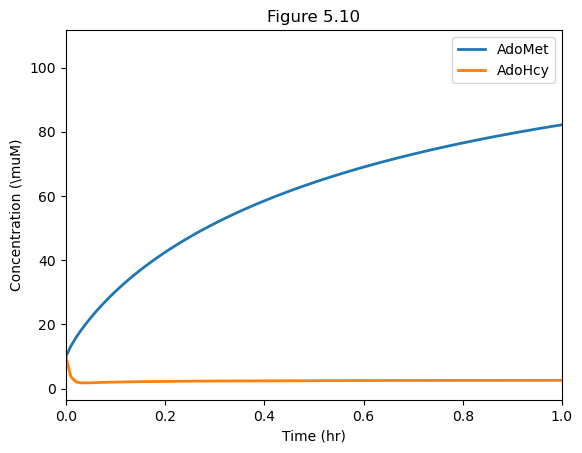

In [24]:
#plot figure  5.10
plt.figure() #generate figure
plt.plot(times, S[:,0], label="AdoMet", linewidth=2)
plt.plot(times, S[:,1], label="AdoHcy", linewidth=2)
plt.xlabel("Time (hr)")
plt.ylabel("Concentration (\muM)")
plt.legend()
plt.xlim(0, 1)
plt.title('Figure 5.10')


In [25]:
S.shape

(10000, 2)

In [26]:
Adomet_ss = S[-1,0]
Adohcy_ss = S[-1,1]
Adomet_ss, Adohcy_ss

(106.41805325046082, 2.6907664288679487)

In [27]:
# Define flux equations for each enzyme at steady state
def calculate_fluxes(Adomet_ss, Adohcy_ss):

#auxilliary variables
    K_MATIII_m1 = 20000/(1+ 5.7*(np.power(Adomet_ss/(Adomet_ss+600),2)))
    K_MET_m1 = 10 * (1 + Adohcy_ss/4)
    Hcy = Adohcy_ss*K_AHC/Adenosine


    v_MATI= v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+Adomet_ss/K_MATI_i))) 
    v_MATIII = v_MATIII_max * (1/(1+ (K_MATIII_m1*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))
    v_GNMT = v_GNMT_max * (1/(1+np.power(K_GNMT_m/Adomet_ss,2.3))) * (1/(1+Adohcy_ss/K_GNMT_i))
    v_MET = v_MET_max * (1/(1+ K_MET_m1/Adomet_ss + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*(K_MET_m1/Adomet_ss)))
    V_D = alpha_d * Hcy;


    return v_MATI, v_MATIII, v_GNMT, v_MET, V_D

In [28]:
fluxes = calculate_fluxes(Adomet_ss, Adohcy_ss)

In [29]:
fluxes

(153.9266148522245,
 204.752550115875,
 1.698846545630626,
 356.980318422467,
 358.6791649680976)

In [15]:
fluxes[0] + fluxes[1], fluxes[2] + fluxes[3], fluxes[4]

(358.6837672332966, 358.6729064031801, 358.67286429534926)

/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_24224/211381907.py:16: RuntimeWarning: divide by zero encountered in divide
  F= (v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+m/K_MATI_i))) + v_MATIII_max * (1/(1+ ((20000/(1+ 5.7*(m/np.power((m+600),2))))*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))) - (v_GNMT_max * (1/(1+np.power((K_GNMT_m/m),2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m))))
/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_24224/211381907.py:17: RuntimeWarning: divide by zero encountered in divide
  G=((v_GNMT_max * (1/(1+np.power((K_GNMT_m/m), 2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m)))) - alpha_d * (h*K_AHC/Adenosine))/(1+K_AHC/Adenosine)
/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_24224/211381907.py:22: UserWarning: The following kwargs were not used by contour: 'labe

Text(0.5, 1.0, 'Figure 5.11A')

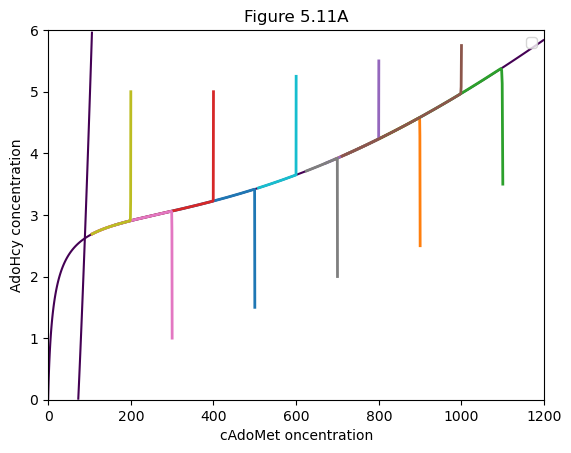

In [16]:
# generate Figure 5.11A
      
#define nullclines:
    
plt.figure() 

from numpy import arange
from numpy import meshgrid

delta = 0.025
xrange = arange(0, 1200, delta)
yrange = arange(0, 6, delta)
m, h = meshgrid(xrange,yrange)


F= (v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+m/K_MATI_i))) + v_MATIII_max * (1/(1+ ((20000/(1+ 5.7*(m/np.power((m+600),2))))*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))) - (v_GNMT_max * (1/(1+np.power((K_GNMT_m/m),2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m))))
G=((v_GNMT_max * (1/(1+np.power((K_GNMT_m/m), 2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m)))) - alpha_d * (h*K_AHC/Adenosine))/(1+K_AHC/Adenosine)



#plot nullclines
plt.contour(m, h, F, [0], label='AdoMet nullcline')
plt.contour(m, h, G, [0], label='AdoHcy nullcline')
plt.legend()

plt.xlim(0,1200)
plt.ylim(0,6)


#set simulation length
Tend=15
times=np.linspace(0,15,1000)

S1_0=[500,1.5]
S1=odeint(methdt, S1_0, times) #run simulation
S2_0=[900,2.5]
S2=odeint(methdt, S2_0, times) #run simulation
S3_0=[1100,3.5]
S3=odeint(methdt, S3_0, times) #run simulation
S4_0=[400,5.0]
S4=odeint(methdt, S4_0, times) #run simulation
S5_0=[800,5.5]
S5=odeint(methdt, S5_0, times) #run simulation
S6_0=[1000,5.75]
S6=odeint(methdt, S6_0, times) #run simulation
S7_0=[300,1]
S7=odeint(methdt, S7_0, times) #run simulation
S8_0=[700,2]
S8=odeint(methdt, S8_0, times) #run simulation
S9_0=[200,5]
S9=odeint(methdt, S9_0, times) #run simulation
S10_0=[600,5.25]
S10=odeint(methdt, S10_0, times) #run simulation

plt.plot(S1[:,0], S1[:,1],  linewidth=2)
plt.plot(S2[:,0], S2[:,1],  linewidth=2)
plt.plot(S3[:,0], S3[:,1], linewidth=2)
plt.plot(S4[:,0], S4[:,1],  linewidth=2)
plt.plot(S5[:,0], S5[:,1], linewidth=2)
plt.plot(S6[:,0], S6[:,1],  linewidth=2)
plt.plot(S7[:,0], S7[:,1],  linewidth=2)
plt.plot(S8[:,0], S8[:,1], linewidth=2)
plt.plot(S9[:,0], S9[:,1],  linewidth=2)
plt.plot(S10[:,0], S10[:,1], linewidth=2)
plt.xlabel("cAdoMet oncentration")
plt.ylabel("AdoHcy concentration")
plt.legend()
plt.title('Figure 5.11A')

/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_24224/4224476275.py:14: RuntimeWarning: divide by zero encountered in divide
  F= (v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+m/K_MATI_i))) + v_MATIII_max * (1/(1+ ((20000/(1+ 5.7*(m/np.power((m+600),2))))*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))) - (v_GNMT_max * (1/(1+np.power((K_GNMT_m/m),2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m))))
/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_24224/4224476275.py:15: RuntimeWarning: divide by zero encountered in divide
  G=((v_GNMT_max * (1/(1+np.power((K_GNMT_m/m), 2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m)))) - alpha_d * (h*K_AHC/Adenosine))/(1+K_AHC/Adenosine)
/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_24224/4224476275.py:19: UserWarning: The following kwargs were not used by contour: 'l

Text(0.5, 1.0, 'Figure 5.11B')

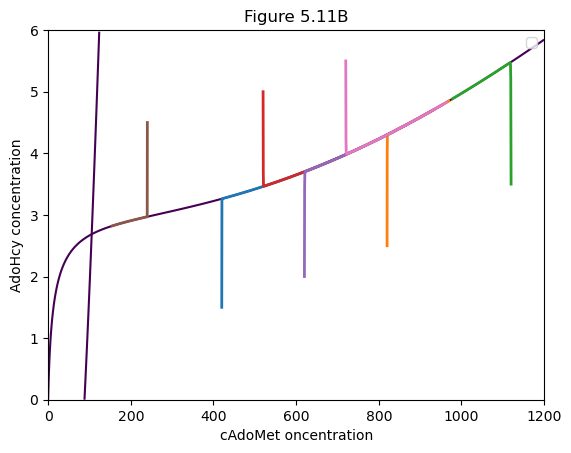

In [17]:
# Figure 5.11B

# set Methionine level
Met=51 
   
plt.figure() 

delta = 0.025
xrange = arange(0, 1200, delta)
yrange = arange(0, 6, delta)
m, h = meshgrid(xrange,yrange)


F= (v_MATI_max * (1/(1+ (K_MATI_m/Met)*(1+m/K_MATI_i))) + v_MATIII_max * (1/(1+ ((20000/(1+ 5.7*(m/np.power((m+600),2))))*K_MATIII_m2)/(np.power(Met,2)+Met*K_MATIII_m2)))) - (v_GNMT_max * (1/(1+np.power((K_GNMT_m/m),2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m))))
G=((v_GNMT_max * (1/(1+np.power((K_GNMT_m/m), 2.3))) * (1/(1+h/K_GNMT_i))+v_MET_max * (1/(1+ (10 * (1 + h/4))/m + 1/A_over_K_MET_m2 + (1/A_over_K_MET_m2)*((10 * (1 + h/4))/m)))) - alpha_d * (h*K_AHC/Adenosine))/(1+K_AHC/Adenosine)


#plot nullclines
plt.contour(m, h, F, [0], label='AdoMet nullcline')
plt.contour(m, h, G, [0], label='AdoHcy nullcline')
plt.legend()

plt.xlim(0,1200)
plt.ylim(0,6)

#set simulation length
Tend=15
times=np.linspace(0,15,1000)

S1_0=[420,1.5]
S1=odeint(methdt, S1_0, times) #run simulation
S2_0=[820,2.5]
S2=odeint(methdt, S2_0, times) #run simulation
S3_0=[1120,3.5]
S3=odeint(methdt, S3_0, times) #run simulation
S4_0=[520,5.0]
S4=odeint(methdt, S4_0, times) #run simulation
S5_0=[620,2]
S5=odeint(methdt, S5_0, times) #run simulation
S6_0=[240,4.5]
S6=odeint(methdt, S6_0, times) #run simulation
S7_0=[720,5.5]
S7=odeint(methdt, S7_0, times) #run simulation


plt.plot(S1[:,0], S1[:,1],  linewidth=2)
plt.plot(S2[:,0], S2[:,1],  linewidth=2)
plt.plot(S3[:,0], S3[:,1], linewidth=2)
plt.plot(S4[:,0], S4[:,1],  linewidth=2)
plt.plot(S5[:,0], S5[:,1], linewidth=2)
plt.plot(S6[:,0], S6[:,1],  linewidth=2)
plt.plot(S7[:,0], S7[:,1],  linewidth=2)

plt.xlabel("cAdoMet oncentration")
plt.ylabel("AdoHcy concentration")
plt.legend()
plt.title('Figure 5.11B')
